# The period-doubling route to chaos

## Duffing's equation:

$$ \frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + \alpha x + \beta x^3 = F \cos{\omega t} $$

which can be rewritten as nonautonomous first-order ODEs:

$$ \frac{dx}{dt} = y $$
$$ \frac{dy}{dt} = - 2 \gamma y - \alpha x - \beta x^3 + F \cos{\omega t} $$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

In [2]:
t, gamma, alpha, beta, F, omega = sp.symbols('t gamma alpha beta F omega')
x = sp.Function('x')(t)
y = sp.Function('y')(t)

diff_eq1 = sp.Eq(x.diff(t), y)
diff_eq1

Eq(Derivative(x(t), t), y(t))

In [3]:
diff_eq2 = sp.Eq(y.diff(t), -2 * gamma * y - alpha * x - beta * x**3 + F * sp.cos(omega * t))
diff_eq2

Eq(Derivative(y(t), t), F*cos(omega*t) - alpha*x(t) - beta*x(t)**3 - 2*gamma*y(t))

In [4]:
ics = {x.subs(t, 0): 0.2, y.subs(t, 0): 0}
ics

{x(0): 0.2, y(0): 0}

We put $\alpha = -1$, $\beta = 1$, $\gamma = 0.25$ and $\omega = 1$. We will study the system for various $F$

In [5]:
alpha_val, beta_val, gamma_val, omega_val = -1, 1, sp.Rational(1, 4), 1
x_eq = copy(diff_eq1)
y_eq = diff_eq2.subs([(alpha, alpha_val), (beta, beta_val), (gamma, gamma_val), (omega, omega_val)])
y_eq

Eq(Derivative(y(t), t), F*cos(t) - x(t)**3 + x(t) - y(t)/2)

In [6]:
def show_phase_portrait(F_value, t_end):
    y_eq_F = y_eq.subs(F, F_value)
    t_a, t_b = 100, t_end
    quality = 4000
    init_x = [0.2]
    init_y = [0]
    trajectories = calculate_numerically_list_of_trajectories(
        [x_eq.rhs, y_eq_F.rhs], [x, y], t, (t_a, t_b), t_a, [(None, None), (None, None)], 
        zip(init_x, init_y), quality, with_t_array=True
    )
    figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
    for trajectory in trajectories:
        axes[0].plot(trajectory[1], trajectory[2], color='maroon')
        axes[1].plot(trajectory[0], trajectory[1], color='maroon', label=f'${x}$')
        axes[1].plot(trajectory[0], trajectory[2], color='blue', label=f'${y}$')
    axes[0].grid()
    axes[1].grid()
    axes[0].set(title='Phase plane portrait', xlabel=f'${x}$', ylabel=f'${y}$')
    axes[1].legend(loc='upper right')
    axes[1].set(title=f'Function of time', xlabel=f'${t}$')
    figure.suptitle(f'${sp.latex(x_eq)}$\n${sp.latex(y_eq_F)}$')

## $F = 0.3$

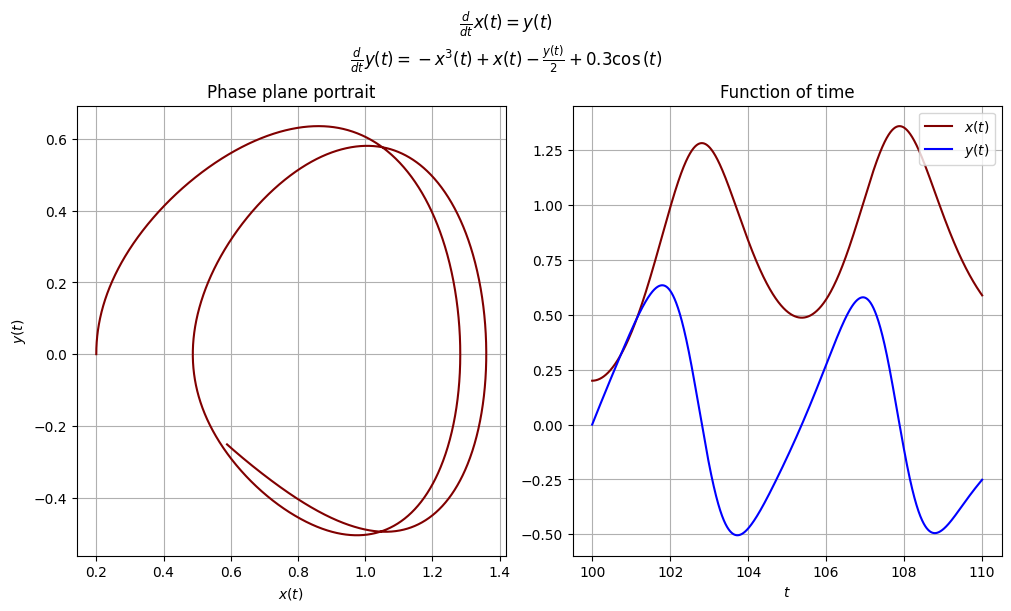

In [7]:
show_phase_portrait(0.3, 110)

## $F = 0.35$

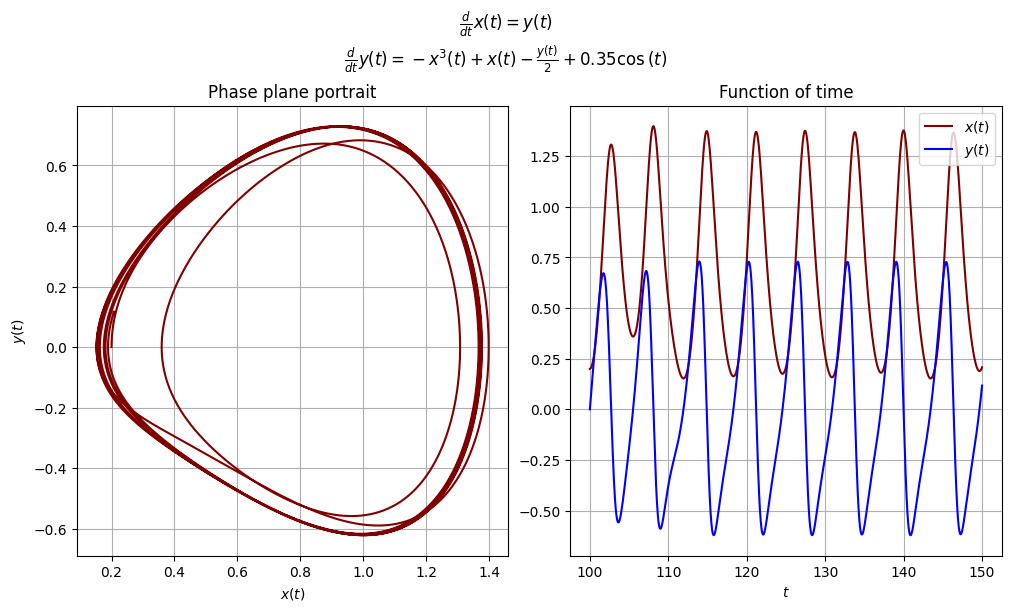

In [8]:
show_phase_portrait(0.35, 150)

## $F = 0.356$

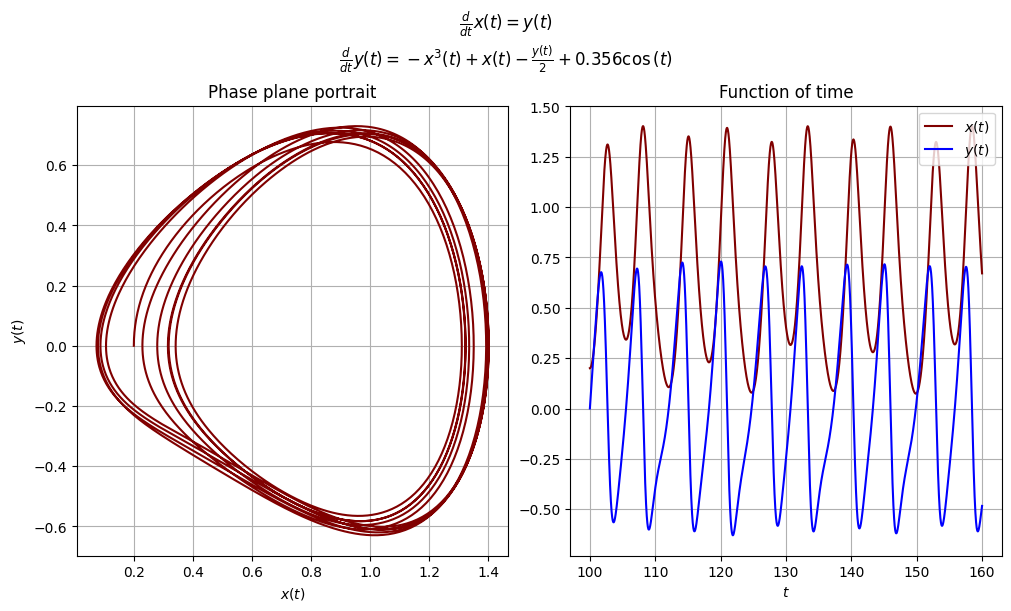

In [9]:
show_phase_portrait(0.356, 160)

## $F = 0.43$

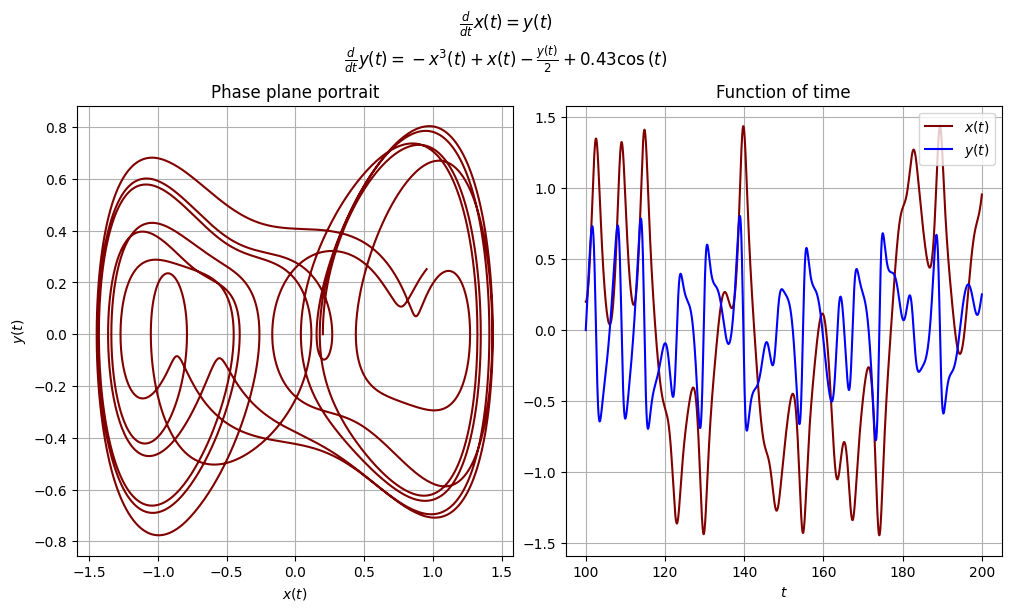

In [11]:
show_phase_portrait(0.43, 200)

## $F = 0.8$

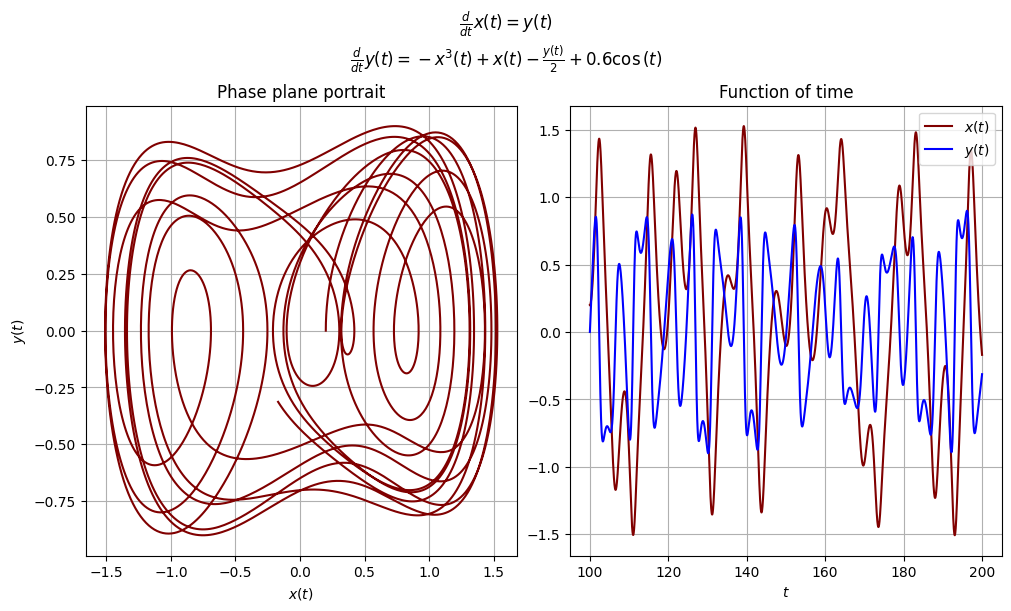

In [16]:
show_phase_portrait(0.6, 200)